In [107]:
import numpy as np
import matplotlib.pyplot as plt
from skeleton import *
from scipy.optimize import curve_fit

Simulation temperature  359.4 K
(108, 3) (108, 3)
[3.67116173e+19 3.67116173e+19 3.67116173e+19 3.67116173e+19
 3.67116173e+19 3.67116173e+19 3.67116173e+19 3.67116173e+19
 3.67116173e+19 3.67116173e+19]
factor:  3.1288682619005755e-09
temp:  1.287358344536415e+16
factor:  1.67074294107248e-07
temp:  190550.72369875916
factor:  0.04335073118825328
temp:  10551.000968534241
factor:  0.1852442129810359
temp:  1557.4786008563074
factor:  0.4809267766727704
temp:  403.29075505967955
factor:  0.944001461849029
temp:  380.2654681245866
factor:  0.9704995945091769
temp:  356.2837068145121
factor:  0.9982577330201035
temp:  355.8639857564533
factor:  1.0089995463142156
temp:  342.52904530142456
factor:  1.0259552037300133
temp:  378.4236574237643
factor:  0.9724419390655519
temp:  354.5231075798209
factor:  1.0108231491023605
temp:  364.12689179081883
factor:  0.9901954577929021
temp:  374.40463398777854
factor:  0.9808272525411545
temp:  360.997808227705
358.39152662702566


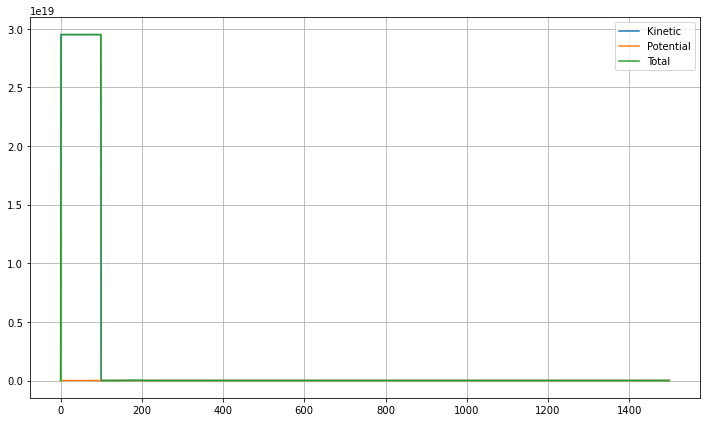

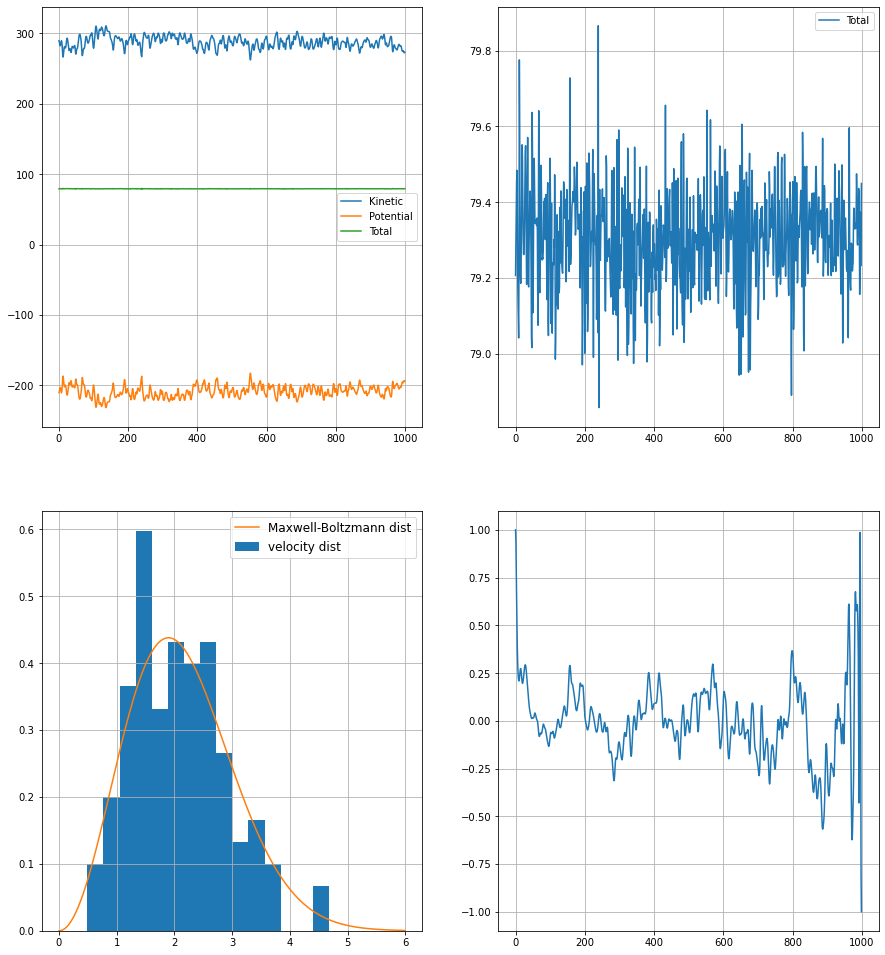

In [298]:
"""Adjustable variables"""
Dim_T = 119.8

T_dim = 3.0
N = 108
Rho = 0.3

T = T_dim*Dim_T
V = N/Rho
L = V**(1/3)
N_cell = (N/4)**(1/3)
alpha = L/(N_cell + 0.001)

D = 3 # number of dimentions
h = 500 # number of time steps

offset = np.asarray([1,1,1]) * 0.1


print('Simulation temperature ',T,'K')
temp = T

# size of the square box the particles are simulated in
#L, alpha = cell_dim(N,'l',temp)

#r0, v0 = init_fcc(L, alpha, offset, temp)
r0, v0 = init_rv_uniform(D, N, L)
v0 = init_v_gauss(N, temp)

start_temp = system_temperature(v0)
print(r0.shape, v0.shape)

N = r0.shape[0]

R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

R, V, pott, r1, v1 = equalise_system(r0, v0, temp, L, grace_time=100, error=1, timespacing=1e-5, adaptive=True)

Kinetic_E_eq = np.sum(np.sum(V**2/ 2,2),1)
Potential_E_eq = np.sum(pott,1)
Total_E_eq = Kinetic_E_eq+Potential_E_eq

plt.figure(figsize = (12,7))
plt.plot(Kinetic_E_eq, label= 'Kinetic')
plt.plot(Potential_E_eq, label= 'Potential')
plt.plot(Total_E_eq, label= 'Total')
plt.legend()
plt.grid()

#Creating a new simulation starting from equilibrium
h = 1000

R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r1,v1,0) # storing initial condions in matrix

Rt, Vt, forcet, pott = Verlet_integrate_images(N, R, V, 1, h, 0, L, D=3, timespacing=1e-2)

Kinetic_E = np.sum(np.sum(Vt**2/ 2,2),1)
Potential_E = np.sum(pott,1)
Total_E = Kinetic_E+Potential_E

t = np.arange(0,h,1)

new_value = Vt[-1,:,:] ** 2 @ np.ones([D,1])
bins = 15

v = np.arange(0,6,0.01)
MB_dist = MB_distribution(v,temp)

Temp_calc = system_temperature(Vt)
print(np.sum(Temp_calc)/h)
auto_corr_T = finite_autocorr(Temp_calc)

plt.figure(figsize = (15,17))

plt.subplot(221)
plt.plot(t, Kinetic_E, label= 'Kinetic')
plt.plot(t, Potential_E, label= 'Potential')
plt.plot(t, Total_E, label= 'Total')
plt.legend()
plt.grid()

plt.subplot(222)
plt.plot(t, Total_E, label= 'Total')
plt.legend()
plt.grid()

plt.subplot(223)
plt.hist(np.sqrt(new_value), bins, density = 'True', label='velocity dist')
plt.plot(v,MB_dist, label='Maxwell-Boltzmann dist')
plt.legend(fontsize='large')
plt.grid()

plt.subplot(224)
plt.plot(auto_corr_T)
plt.grid()
plt.show()

np.save('../Data/Data_Marc/Simulation_Gas_Temp_3.0_108_par_un_dis_2_Rt',Rt)
np.save('../Data/Data_Marc/Simulation_Gas_Temp_3.0_108_par_un_dis_2_Vt',Vt)
np.save('../Data/Data_Marc/Simulation_Gas_Temp_3.0_108_par_un_dis_2_forcet',forcet)
np.save('../Data/Data_Marc/Simulation_Gas_Temp_3.0_108_par_un_dis_2_pott',pott)

In [286]:
R, V, pott, r1, v1 = equalise_system(r0, v0, temp, L, grace_time=50, error=2, timespacing=1e-5, adaptive=True)

[290.39868069 290.39828513 290.3978896  290.39749411 290.39709865
 290.39670322 290.39630783 290.39591246 290.39551713 290.39512184]
factor:  0.9819386562281668
temp:  280.22121259716795


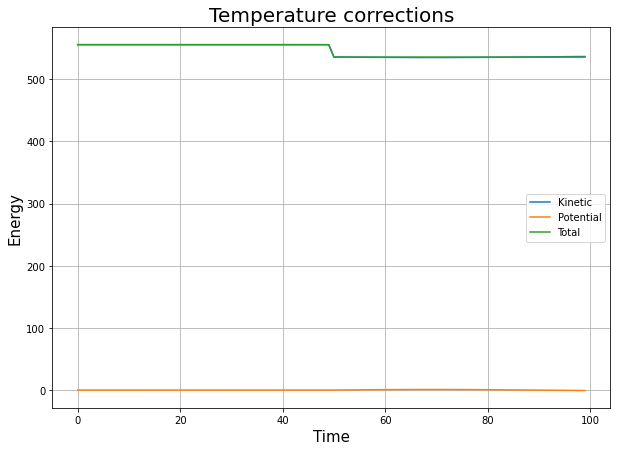

In [287]:
h1, N, D = np.shape(R)

Kinetic_E = np.sum(np.sum(V**2/ 2,2),1)
Potential_E = np.sum(pott,1)
Total_E = Kinetic_E+Potential_E

t = np.arange(0,h1,1)

plt.figure(figsize = (10,7))
plt.plot(t, Kinetic_E, label = 'Kinetic')
plt.plot(t, Potential_E, label = 'Potential')
plt.plot(t, Total_E, label = 'Total')
plt.title('Temperature corrections', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Energy', fontsize = 15)
plt.legend()
plt.grid()
plt.show()

In [288]:
#Creating a new simulation starting from equilibrium

h = 500

R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r1,v1,0) # storing initial condions in matrix

In [289]:
Rt, Vt, forcet, pott = Verlet_integrate_images(N, R, V, 1, h, 0, L, D=3, timespacing=1e-2)

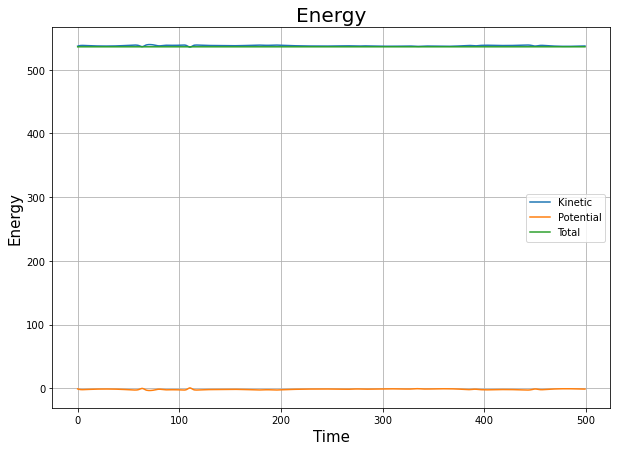

In [290]:
Kinetic_E = np.sum(np.sum(Vt**2/ 2,2),1)
Potential_E = np.sum(pott,1)
Total_E = Kinetic_E+Potential_E

t = np.arange(0,h,1)

plt.figure(figsize = (10,7))
plt.plot(t, Kinetic_E, label= 'Kinetic')
plt.plot(t, Potential_E, label= 'Potential')
plt.plot(t, Total_E, label= 'Total')
plt.title('Energy', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Energy', fontsize = 15)
plt.legend()
plt.grid()
plt.show()

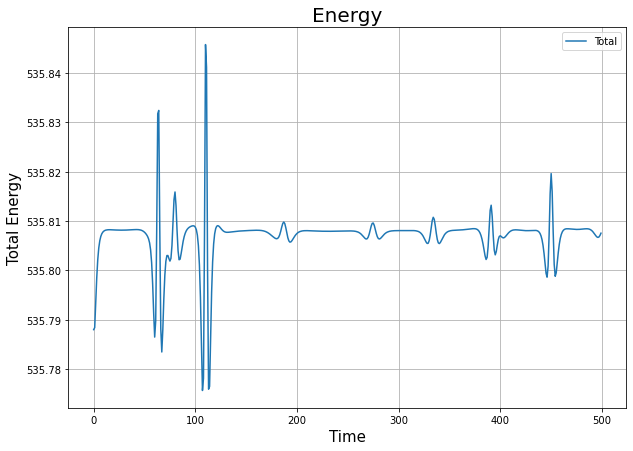

In [291]:
plt.figure(figsize = (10,7))
plt.plot(t, Total_E, label= 'Total')
plt.title('Energy', fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Total Energy', fontsize = 15)
plt.legend()
plt.grid()
plt.show()

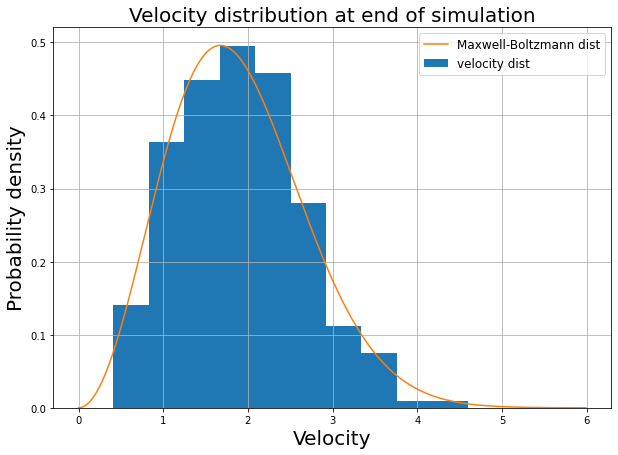

In [292]:
new_value = Vt[-1,:,:] ** 2 @ np.ones([D,1])
bins = 10

v = np.arange(0,6,0.01)
MB_dist = MB_distribution(v,temp)

plt.figure(figsize = (10, 7))
plt.hist(np.sqrt(new_value), bins, density = 'True', label='velocity dist')
plt.plot(v,MB_dist, label='Maxwell-Boltzmann dist')
plt.xlabel('Velocity',fontsize=20)
plt.ylabel('Probability density',fontsize=20)
plt.legend(fontsize='large')
plt.title('Velocity distribution at end of simulation',fontsize=20)
plt.grid()
plt.show()

## Kinetic energy

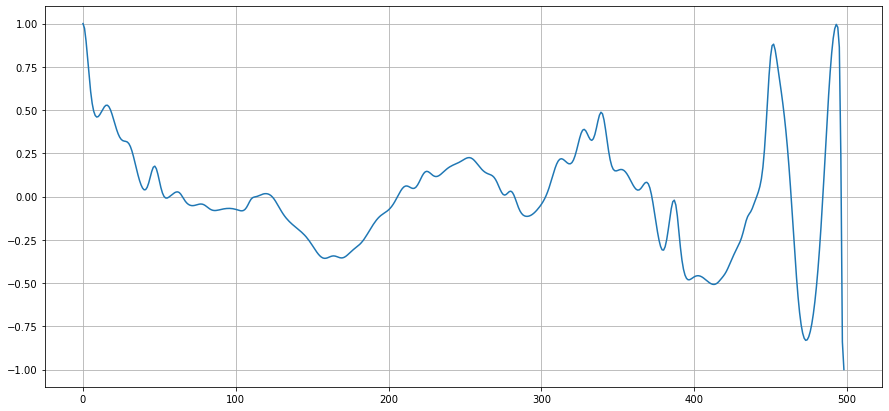

In [293]:
particle_kin_E = particle_E_kin(Vt)
auto_corr_kin_E = finite_autocorr(Kinetic_E)

plt.figure(figsize = (15,7))
plt.plot(auto_corr_kin_E)
plt.grid()

In [170]:

def exp_func(t,tau):
    return np.exp(-t/ tau)

t0 = 50
popt_kin_E, pcov_kin_E = curve_fit(exp_func, t[0:t0], auto_corr_kin_E[0:t0])
print(popt_kin_E)

[29.89096628]


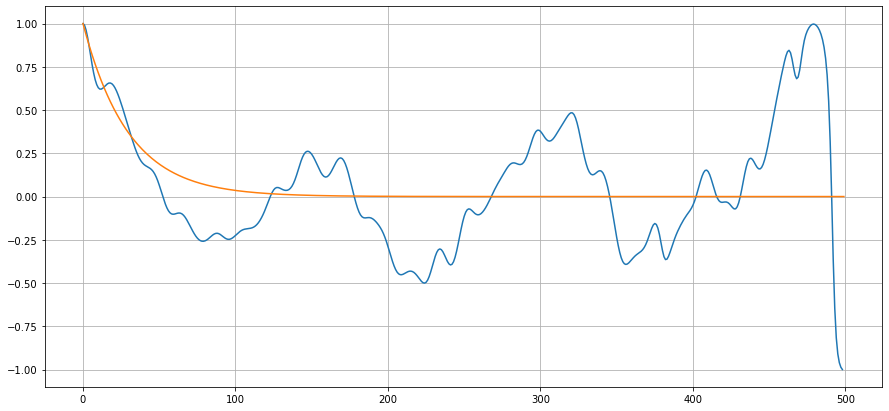

In [171]:
plt.figure(figsize = (15,7))
plt.plot(auto_corr_kin_E, label = 'auto-corration')
plt.plot(exp_func(t,popt_kin_E), label = 'fit')
plt.grid()

In [172]:
error_data_kin_E = error(Kinetic_E, popt_kin_E)

print(np.sum(Kinetic_E)/ h)
print(error_data_kin_E)


96.85618752721268
[0.27771635]


## Temperature

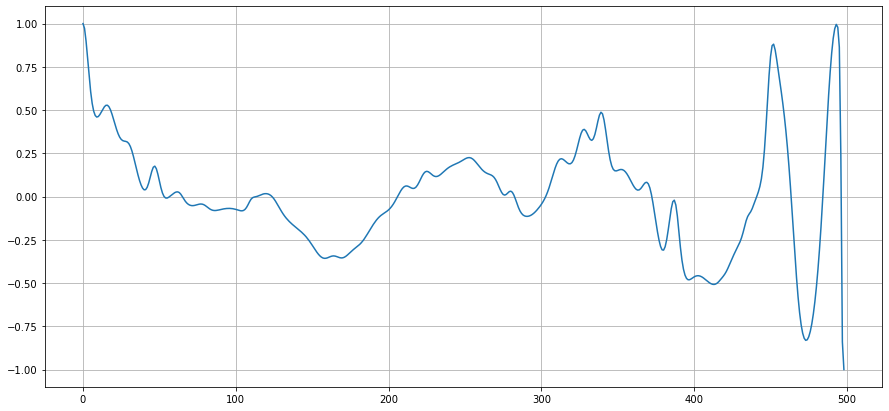

In [294]:
T = system_temperature(Vt)
auto_corr_T = finite_autocorr(T)

plt.figure(figsize = (15,7))
plt.plot(auto_corr_T)
plt.grid()

tau =  [18.86549161]
Temperature =  280.7437855095578
error temperature =  [0.09090556]


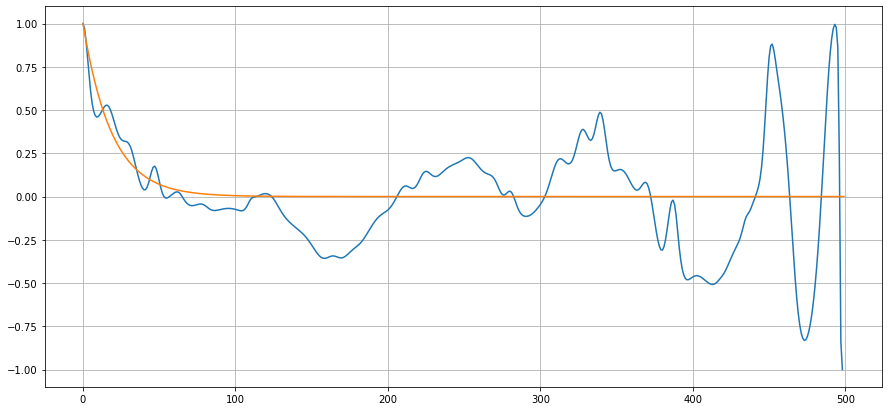

In [295]:
t0 = 120
popt_T, pcov_T = curve_fit(exp_func, t[0:t0], auto_corr_T[0:t0])
print('tau = ',popt_T)

plt.figure(figsize = (15,7))
plt.plot(auto_corr_T, label = 'auto-corration')
plt.plot(exp_func(t,popt_T), label = 'fit')
plt.grid()

error_data_T = error(T, popt_T)

print('Temperature = ',np.sum(T)/ h)
print('error temperature = ',error_data_T)

## Total energy

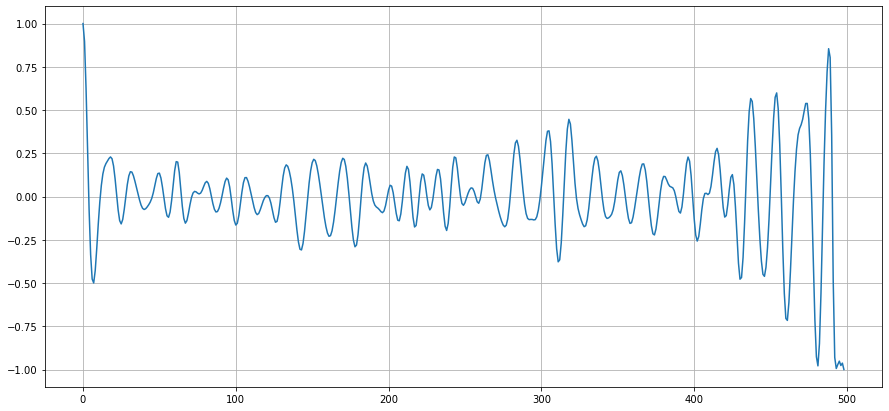

In [150]:
auto_corr_tot_E = finite_autocorr(Total_E)

plt.figure(figsize = (15,7))
plt.plot(auto_corr_tot_E)
plt.grid()

In [296]:
np.save('../Data/Data_Marc/Simulation_Gas_Temp_280_un_dis_1_Rt',Rt)
np.save('../Data/Data_Marc/Simulation_Gas_Temp_280_un_dis_1_Vt',Vt)
np.save('../Data/Data_Marc/Simulation_Gas_Temp_280_un_dis_1_forcet',forcet)
np.save('../Data/Data_Marc/Simulation_Gas_Temp_280_un_dis_1_pott',pott)